In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
import re

#Convert the xml file to usable csv format

# Function to clean the 'Body' field
def clean_body(text):
    if text is None:
        return ''
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove non-ASCII characters
    clean_text = clean_text.encode('ascii', 'ignore').decode('ascii')
    return clean_text

# Define the path to your XML file
xml_file = 'Posts_Sample.xml'

# Initialize a list to store the extracted data
data = []

# Parse the XML data from file
try:
    tree = ET.parse(xml_file)
    root = tree.getroot()
    # Process XML data if parsing was successful
    for row in root.findall('row'):
        data.append({
            'Id': row.get('Id'),
            'PostTypeId': row.get('PostTypeId'),
            'ParentId': row.get('ParentId'),
            'CreationDate': row.get('CreationDate'),
            'Score': row.get('Score'),
            'Body': clean_body(row.get('Body')),
            'OwnerUserId': row.get('OwnerUserId'),
            'LastEditorUserId': row.get('LastEditorUserId'),
            'LastEditDate': row.get('LastEditDate'),
            'LastActivityDate': row.get('LastActivityDate'),
            'CommentCount': row.get('CommentCount'),
            'ContentLicense': row.get('ContentLicense'),
            'AcceptedAnswerId': row.get('AcceptedAnswerId'),
            'ViewCount': row.get('ViewCount'),
            'Title': row.get('Title'),
            'Tags': row.get('Tags'),
            'AnswerCount': row.get('AnswerCount'),
            'FavoriteCount': row.get('FavoriteCount'),
            'OwnerDisplayName': row.get('OwnerDisplayName'),
            'CommunityOwnedDate': row.get('CommunityOwnedDate'),
            'LastEditorDisplayName': row.get('LastEditorDisplayName'),
            'ClosedDate': row.get('ClosedDate')
        })
except ET.ParseError as e:
    print(f"Error parsing XML: {e}")
except FileNotFoundError as e:
    print(f"Error: {e}")

# Convert the list of dictionaries to a DataFrame
if data:
    df = pd.DataFrame(data)
    # Save the DataFrame to CSV
    csv_file = 'Posts_Sample.csv'
    df.to_csv(csv_file, index=False)
    print(f"Data saved to {csv_file}")
    
    # Load the data back into a DataFrame
    loaded_df = pd.read_csv(csv_file)
    # Display the first few rows of the DataFrame
    print(loaded_df.head())
else:
    print("No data to save.")

Data saved to Posts_Sample.csv
      Id  PostTypeId  ParentId             CreationDate  Score  \
0  38779           1       NaN  2008-09-02T03:41:06.880      6   
1  38781           2   23930.0  2008-09-02T03:44:26.013      3   
2  38784           1       NaN  2008-09-02T03:49:17.920      7   
3  38785           2   38784.0  2008-09-02T03:54:14.587      4   
4  38787           2   38769.0  2008-09-02T03:58:41.830      3   

                                                Body  OwnerUserId  \
0  I have a wcf application hosted in a windows s...        781.0   
1  Agda 2: Functional, dependently typed.\n\ndata...       3434.0   
2  I use Delphi for many years, and although I ha...       4149.0   
3  Ctrl K + Ctrl K - Add/Remove Bookmark on Line\...        380.0   
4  MPP does have its own object model that can be...        380.0   

   LastEditorUserId             LastEditDate         LastActivityDate  ...  \
0            1116.0  2008-09-02T08:49:19.323  2013-06-24T17:03:55.833  ...   
1

In [2]:
import pandas as pd
import xml.etree.ElementTree as ET
import re
# reading the csv
df = pd.read_csv("Posts_Sample.csv")

In [3]:
# Get the first five rows
df.head()

,Id,PostTypeId,ParentId,CreationDate,Score,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,...,AcceptedAnswerId,ViewCount,Title,Tags,AnswerCount,FavoriteCount,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,ClosedDate
0,38779,1,NaN,2008-09-02T03:41:06.880,6,I have a wcf application hosted in a windows s...,781.0,1116.0,2008-09-02T08:49:19.323,2013-06-24T17:03:55.833,...,40472.0,6282.0,What SPN do I need to set for a net.tcp service?,|wcf|security|spn|,2.0,0.0,Esteban,NaN,John Nolan,NaN
1,38781,2,23930.0,2008-09-02T03:44:26.013,3,"Agda 2: Functional, dependently typed.\n\ndata...",3434.0,3434.0,2008-09-18T22:09:07.470,2008-09-18T22:09:07.470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-19T07:14:59.840,Apocalisp,NaN
2,38784,1,NaN,2008-09-02T03:49:17.920,7,"I use Delphi for many years, and although I ha...",4149.0,4779472.0,2015-06-27T14:21:16.453,2021-11-25T10:14:44.487,...,41285.0,3474.0,Visual Studio equivalent to Delphi bookmarks,|visual-studio|delphi|brief-bookmarks|,8.0,0.0,NaN,NaN,NaN,NaN
3,38785,2,38784.0,2008-09-02T03:54:14.587,4,Ctrl K + Ctrl K - Add/Remove Bookmark on Line\...,380.0,9454010.0,2021-06-15T02:11:14.180,2021-06-15T02:11:14.180,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaibhav,NaN,NaN,NaN
4,38787,2,38769.0,2008-09-02T03:58:41.830,3,MPP does have its own object model that can be...,380.0,NaN,NaN,2008-09-02T03:58:41.830,...,NaN,NaN,NaN,NaN,NaN,NaN,Vaibhav,NaN,NaN,NaN


In [4]:
# Get the kast 5 rows
df.tail()

,Id,PostTypeId,ParentId,CreationDate,Score,Body,OwnerUserId,LastEditorUserId,LastEditDate,LastActivityDate,...,AcceptedAnswerId,ViewCount,Title,Tags,AnswerCount,FavoriteCount,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName,ClosedDate
499993,717339,2,717329.0,2009-04-04T16:25:24.053,-1,"No, Flash is client side. With Flex, you can c...",85170.0,NaN,NaN,2009-04-04T16:25:24.053,...,NaN,NaN,NaN,NaN,NaN,NaN,CookieOfFortune,NaN,NaN,NaN
499994,717340,2,717328.0,2009-04-04T16:25:34.880,5,"If I understand correctly, you want the exampl...",86470.0,NaN,NaN,2009-04-04T16:25:34.880,...,NaN,NaN,NaN,NaN,NaN,NaN,v3,NaN,NaN,NaN
499995,717341,2,717328.0,2009-04-04T16:25:36.063,33,"You may use strrev to reverse the string, and ...",73278.0,73278.0,2009-04-04T17:46:14.920,2009-04-04T17:46:14.920,...,NaN,NaN,NaN,NaN,NaN,NaN,Moff,NaN,Moff,NaN
499996,675364,2,675271.0,2009-03-23T21:47:24.850,0,You can put saving emails in transaction. Then...,58877.0,NaN,NaN,2009-03-23T21:47:24.850,...,NaN,NaN,NaN,NaN,NaN,NaN,klew,NaN,NaN,NaN
499997,675365,1,NaN,2009-03-23T21:47:24.957,1,Some of the forms represent parent objects and...,81670.0,137969.0,2012-05-04T08:28:01.677,2012-05-04T08:28:01.677,...,NaN,86.0,How would I disable the 5 same fields of speci...,|django-forms|,1.0,NaN,josh,NaN,Gamecat,NaN


In [5]:
#Show the rows and columns values
df.shape

(499998, 22)

In [6]:
df.describe

<bound method NDFrame.describe of             Id  PostTypeId  ParentId             CreationDate  Score  \
0        38779           1       NaN  2008-09-02T03:41:06.880      6   
1        38781           2   23930.0  2008-09-02T03:44:26.013      3   
2        38784           1       NaN  2008-09-02T03:49:17.920      7   
3        38785           2   38784.0  2008-09-02T03:54:14.587      4   
4        38787           2   38769.0  2008-09-02T03:58:41.830      3   
...        ...         ...       ...                      ...    ...   
499993  717339           2  717329.0  2009-04-04T16:25:24.053     -1   
499994  717340           2  717328.0  2009-04-04T16:25:34.880      5   
499995  717341           2  717328.0  2009-04-04T16:25:36.063     33   
499996  675364           2  675271.0  2009-03-23T21:47:24.850      0   
499997  675365           1       NaN  2009-03-23T21:47:24.957      1   

                                                     Body  OwnerUserId  \
0       I have a wcf applic

In [7]:
#Display the columns names
df.columns

Index(['Id', 'PostTypeId', 'ParentId', 'CreationDate', 'Score', 'Body',
       'OwnerUserId', 'LastEditorUserId', 'LastEditDate', 'LastActivityDate',
       'CommentCount', 'ContentLicense', 'AcceptedAnswerId', 'ViewCount',
       'Title', 'Tags', 'AnswerCount', 'FavoriteCount', 'OwnerDisplayName',
       'CommunityOwnedDate', 'LastEditorDisplayName', 'ClosedDate'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499998 entries, 0 to 499997
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Id                     499998 non-null  int64  
 1   PostTypeId             499998 non-null  int64  
 2   ParentId               386212 non-null  float64
 3   CreationDate           499998 non-null  object 
 4   Score                  499998 non-null  int64  
 5   Body                   499998 non-null  object 
 6   OwnerUserId            471654 non-null  float64
 7   LastEditorUserId       181685 non-null  float64
 8   LastEditDate           186343 non-null  object 
 9   LastActivityDate       499998 non-null  object 
 10  CommentCount           499998 non-null  int64  
 11  ContentLicense         499998 non-null  object 
 12  AcceptedAnswerId       85439 non-null   float64
 13  ViewCount              113786 non-null  float64
 14  Title                  113786 non-nu

In [9]:
# Check the type of the column
df.dtypes

Id                         int64
PostTypeId                 int64
ParentId                 float64
CreationDate              object
Score                      int64
Body                      object
OwnerUserId              float64
LastEditorUserId         float64
LastEditDate              object
LastActivityDate          object
CommentCount               int64
ContentLicense            object
AcceptedAnswerId         float64
ViewCount                float64
Title                     object
Tags                      object
AnswerCount              float64
FavoriteCount            float64
OwnerDisplayName          object
CommunityOwnedDate        object
LastEditorDisplayName     object
ClosedDate                object
dtype: object

In [10]:
# Convert to appropriate data types
df = df.astype({
    'Id': 'int',
    'PostTypeId': 'int',
    'ParentId': 'Int64',  # Use 'Int64' to allow for missing values
    'Score': 'int',
    'Body': 'string',
    'OwnerUserId': 'Int64',  # Use 'Int64' to allow for missing values
    'LastEditorUserId': 'Int64',  # Use 'Int64' to allow for missing values
    'CommentCount': 'int',
    'ContentLicense': 'string',
    'AcceptedAnswerId': 'Int64',  # Use 'Int64' to allow for missing values
    'ViewCount': 'Int64',  # Use 'Int64' to allow for missing values
    'Title': 'string',
    'Tags': 'string',
    'AnswerCount': 'Int64',  # Use 'Int64' to allow for missing values
    'FavoriteCount': 'Int64',  # Use 'Int64' to allow for missing values
    'OwnerDisplayName': 'string',
    'LastEditorDisplayName': 'string'
})

# Convert date columns to datetime format
df['CreationDate'] = pd.to_datetime(df['CreationDate'], errors='coerce')
df['LastEditDate'] = pd.to_datetime(df['LastEditDate'], errors='coerce')
df['LastActivityDate'] = pd.to_datetime(df['LastActivityDate'], errors='coerce')
df['CommunityOwnedDate'] = pd.to_datetime(df['CommunityOwnedDate'], errors='coerce')
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'], errors='coerce')

In [11]:
# Confirm the data types are in order
df.dtypes

Id                                int32
PostTypeId                        int32
ParentId                          Int64
CreationDate             datetime64[ns]
Score                             int32
Body                             string
OwnerUserId                       Int64
LastEditorUserId                  Int64
LastEditDate             datetime64[ns]
LastActivityDate         datetime64[ns]
CommentCount                      int32
ContentLicense                   string
AcceptedAnswerId                  Int64
ViewCount                         Int64
Title                            string
Tags                             string
AnswerCount                       Int64
FavoriteCount                     Int64
OwnerDisplayName                 string
CommunityOwnedDate       datetime64[ns]
LastEditorDisplayName            string
ClosedDate               datetime64[ns]
dtype: object

In [12]:
# Check for missing values
df.isna().sum()

Id                            0
PostTypeId                    0
ParentId                 113786
CreationDate                  0
Score                         0
Body                          0
OwnerUserId               28344
LastEditorUserId         318313
LastEditDate             313655
LastActivityDate              0
CommentCount                  0
ContentLicense                0
AcceptedAnswerId         414559
ViewCount                386212
Title                    386212
Tags                     386211
AnswerCount              386212
FavoriteCount            428800
OwnerDisplayName          45696
CommunityOwnedDate       480359
LastEditorDisplayName    383087
ClosedDate               491635
dtype: int64

In [13]:
# Remove columns with high missing values that not necessary for analysis

try: 
    columns_to_drop = ['ParentId', 'LastEditorUserId','LastEditDate', 'AcceptedAnswerId','ViewCount', 'AnswerCount', 'FavoriteCount', 'CommunityOwnedDate', 'LastEditorDisplayName', 'ClosedDate']
    df = df.drop(columns=columns_to_drop)
except: 
    print("Columns are either deleted earlier or not existing")

df.head()

,Id,PostTypeId,CreationDate,Score,Body,OwnerUserId,LastActivityDate,CommentCount,ContentLicense,Title,Tags,OwnerDisplayName
0,38779,1,2008-09-02 03:41:06.880,6,I have a wcf application hosted in a windows s...,781,2013-06-24 17:03:55.833,0,CC BY-SA 2.5,What SPN do I need to set for a net.tcp service?,|wcf|security|spn|,Esteban
1,38781,2,2008-09-02 03:44:26.013,3,"Agda 2: Functional, dependently typed. data N...",3434,2008-09-18 22:09:07.470,0,CC BY-SA 2.5,<NA>,<NA>,<NA>
2,38784,1,2008-09-02 03:49:17.920,7,"I use Delphi for many years, and although I ha...",4149,2021-11-25 10:14:44.487,1,CC BY-SA 3.0,Visual Studio equivalent to Delphi bookmarks,|visual-studio|delphi|brief-bookmarks|,<NA>
3,38785,2,2008-09-02 03:54:14.587,4,Ctrl K + Ctrl K - Add/Remove Bookmark on Line ...,380,2021-06-15 02:11:14.180,1,CC BY-SA 4.0,<NA>,<NA>,Vaibhav
4,38787,2,2008-09-02 03:58:41.830,3,MPP does have its own object model that can be...,380,2008-09-02 03:58:41.830,0,CC BY-SA 2.5,<NA>,<NA>,Vaibhav


In [14]:
df.describe()

,Id,PostTypeId,Score,OwnerUserId,CommentCount
count,499998.000000,499998.000000,499998.000000,471654.0,499998.000000
mean,377733.316895,1.772427,18.115544,56938.782974,0.991692
std,205587.391400,0.419266,154.339219,284904.734441,2.052015
min,4.000000,1.000000,-73.000000,1.0,0.000000
25%,203939.250000,2.000000,1.000000,6061.0,0.000000
50%,381702.000000,2.000000,2.000000,18393.0,0.000000
75%,554731.750000,2.000000,6.000000,39307.0,1.000000
max,757061.000000,2.000000,18566.000000,9827379.0,106.000000


In [15]:
# Further Clean the Data

# Drop rows with missing values
df = df.dropna()

# Remove unnessary Characters
def remove_unnecessary_characters(Body):
    content = re.sub(r'@', '', str(Body))
    content = re.sub(r'<.*?#>', '', str(Body))
    content = re.sub(r'[^a-zA-Z0-9\s]', '', str(Body))
    content = re.sub(r'\s+', ' ', str(Body)).strip()
    return content
df['Body'] = df['Body'].apply(remove_unnecessary_characters)

df.head(100)

,Id,PostTypeId,CreationDate,Score,Body,OwnerUserId,LastActivityDate,CommentCount,ContentLicense,Title,Tags,OwnerDisplayName
0,38779,1,2008-09-02 03:41:06.880,6,I have a wcf application hosted in a windows s...,781,2013-06-24 17:03:55.833,0,CC BY-SA 2.5,What SPN do I need to set for a net.tcp service?,|wcf|security|spn|,Esteban
5,38789,1,2008-09-02 03:59:44.417,4,I have a web-service that I will be deploying ...,3149,2017-07-04 08:48:45.030,0,CC BY-SA 3.0,Web Service Namespace Dynamic Naming,|c#|asp.net|web-services|,Kevin Lamb
6,38791,1,2008-09-02 04:01:09.827,4,Which Database table Schema is more efficient ...,191,2008-09-17 13:44:01.717,1,CC BY-SA 2.5,Which database table Schema is more efficient?,|database-design|,Ramesh Soni
13,38801,1,2008-09-02 04:10:50.413,48,What are the ways that you use to model and re...,2027,2017-10-19 06:49:29.500,0,CC BY-SA 3.0,SQL - How to store and navigate hierarchies?,|sql|sql-server|oracle|database-design|hierarchy|,realcals
21,38820,1,2008-09-02 04:34:20.963,46,Which class design is better and why? public c...,191,2014-08-21 19:59:28.500,1,CC BY-SA 2.5,Which class design is better?,|oop|class-design|,Ramesh Soni
...,...,...,...,...,...,...,...,...,...,...,...,...
529,41838,1,2008-09-03 14:48:16.660,2,We are about to get a canned package in that h...,3430,2014-07-14 11:01:14.527,0,CC BY-SA 3.0,Black Box testing software,|oracle|testing|black-box|,Ken Wren
530,41839,1,2008-09-03 14:48:48.187,1,I'm writing a tool to run a series of integrat...,511,2014-07-14 10:59:46.603,0,CC BY-SA 3.0,What is a good markup language to use for tests?,|testing|integration-testing|,krujos
531,41842,1,2008-09-03 14:50:03.223,17,When should I include PDB files for a producti...,3615,2023-04-22 06:59:27.050,1,CC BY-SA 3.0,"PDB files for production app and the ""Optimize...",|c#|visual-studio|build-process|,JC
534,39254,1,2008-09-02 11:22:31.733,7,When looking at a SSI printenv dump I see a va...,2974,2008-09-20 01:19:13.983,0,CC BY-SA 2.5,What's the difference between DOCUMENT_URI and...,|apache|ssi|,robwells57


In [16]:
df.shape

(86629, 12)

In [17]:
# Check again for missing values again
df.isna().sum()

Id                  0
PostTypeId          0
CreationDate        0
Score               0
Body                0
OwnerUserId         0
LastActivityDate    0
CommentCount        0
ContentLicense      0
Title               0
Tags                0
OwnerDisplayName    0
dtype: int64

# Univariate Analysis

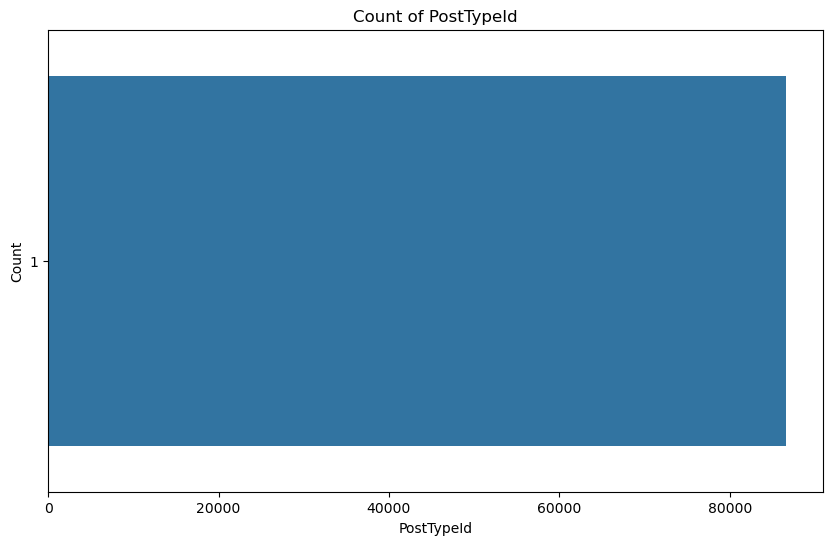

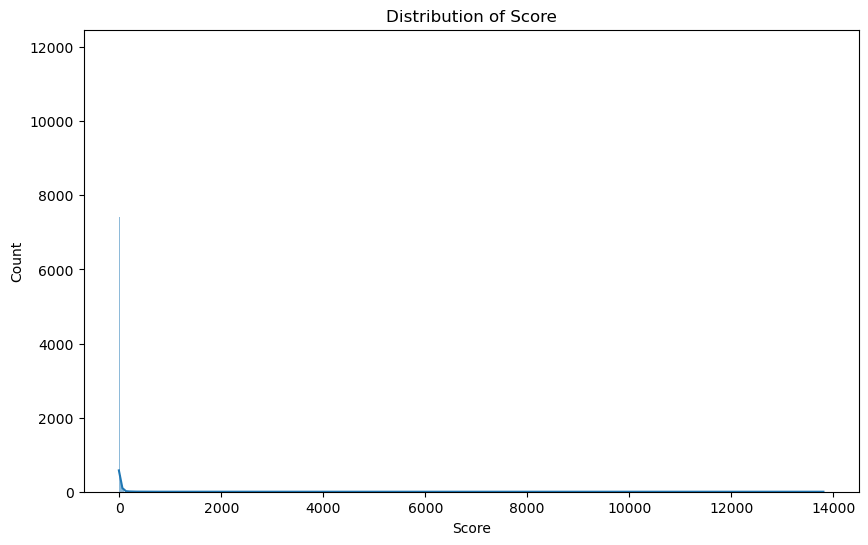

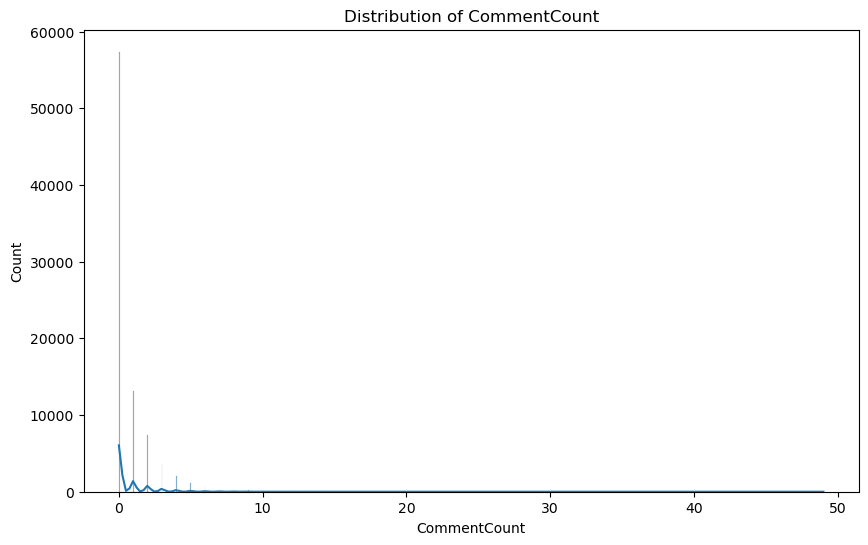

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting function for univariate analysis
def plot_univariate(column, plot_type='hist'):
    plt.figure(figsize=(10, 6))
    if plot_type == 'hist':
        sns.histplot(df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
    elif plot_type == 'count':
        sns.countplot(y=column, data=df)
        plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Plot distributions for PostTypeId, Score, and CommentCount
plot_univariate('PostTypeId', 'count')
plot_univariate('Score', 'hist')
plot_univariate('CommentCount', 'hist')


# Bi-Variate Analysis

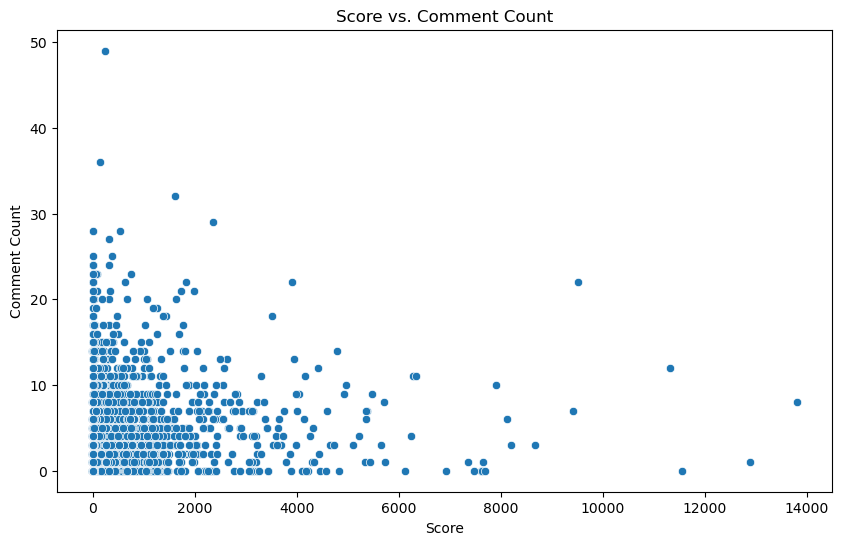

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for Score vs. CommentCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='CommentCount', data=df)
plt.title('Score vs. Comment Count')
plt.xlabel('Score')
plt.ylabel('Comment Count')
plt.show()



# Hypothesis Questions 1 
What are the most popular programming languages/topics over time on Stack Overflow, and how have their popularity trends evolved?

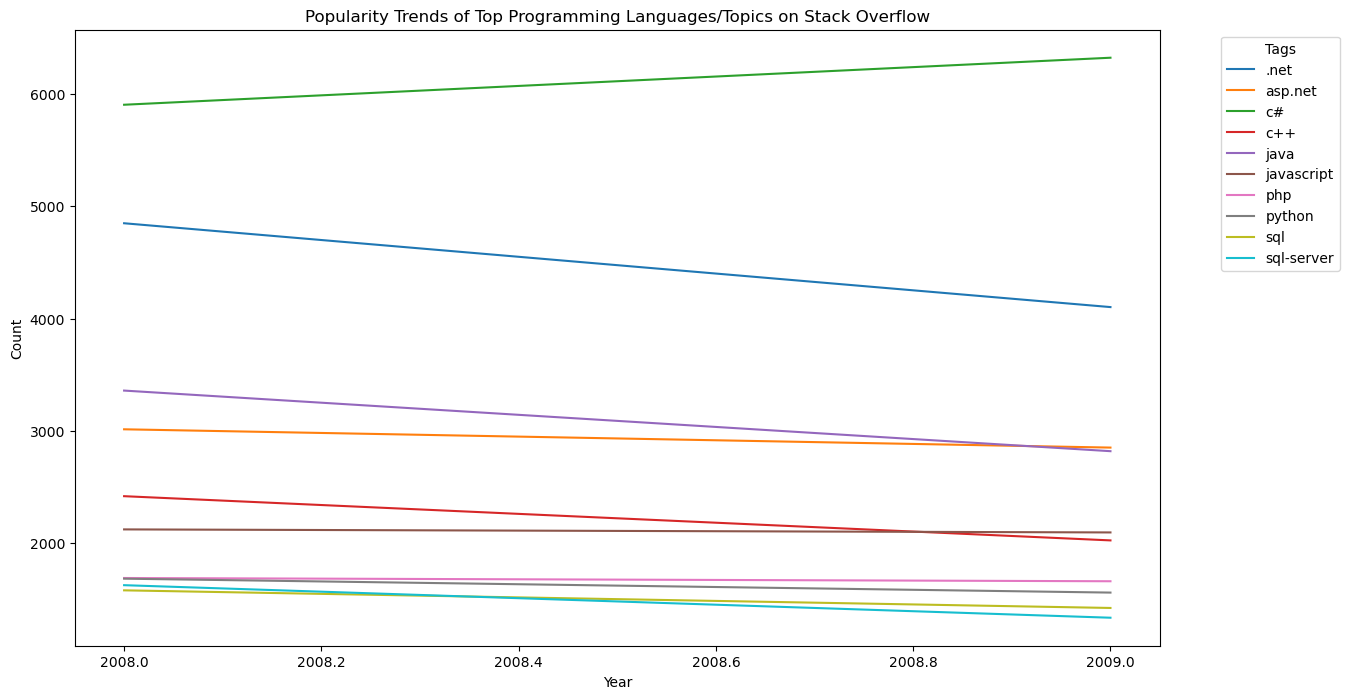

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
import seaborn as sns

# Convert CreationDate to datetime
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

# Extract year from CreationDate
df['Year'] = df['CreationDate'].dt.year

# Function to extract tags
def extract_tags(tags):
    if pd.isna(tags):
        return []
    return tags.strip('|').split('|')

# Apply the function to extract tags
df['TagsList'] = df['Tags'].apply(extract_tags)

# Explode the TagsList to have each tag in a separate row
tags_exploded = df.explode('TagsList')

# Group by year and tag and count the occurrences
tag_trends = tags_exploded.groupby(['Year', 'TagsList']).size().reset_index(name='Count')

# Get the top N tags overall to limit the number of lines in the plot
top_n = 10
top_tags = tag_trends.groupby('TagsList')['Count'].sum().nlargest(top_n).index

# Filter the tag_trends DataFrame to only include the top tags
filtered_tag_trends = tag_trends[tag_trends['TagsList'].isin(top_tags)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_tag_trends, x='Year', y='Count', hue='TagsList')
plt.title('Popularity Trends of Top Programming Languages/Topics on Stack Overflow')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [21]:
# Convert the CreationDate to datetime
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

# Extract year and month for grouping
df['YearMonth'] = df['CreationDate'].dt.to_period('M')

In [22]:
# Extract tags and explode the dataframe
df['Tags'] = df['Tags'].str.strip('|').str.split('|')
tags_df = df.explode('Tags')

# Count the frequency of tags by month
tags_over_time = tags_df.groupby(['YearMonth', 'Tags']).size().reset_index(name='Count')

# Get the top 10 tags
top_tags = tags_over_time.groupby('Tags')['Count'].sum().nlargest(10).index
filtered_tags_over_time = tags_over_time[tags_over_time['Tags'].isin(top_tags)]

# Pivot the data for plotting
pivoted_tags = filtered_tags_over_time.pivot(index='YearMonth', columns='Tags', values='Count').fillna(0)

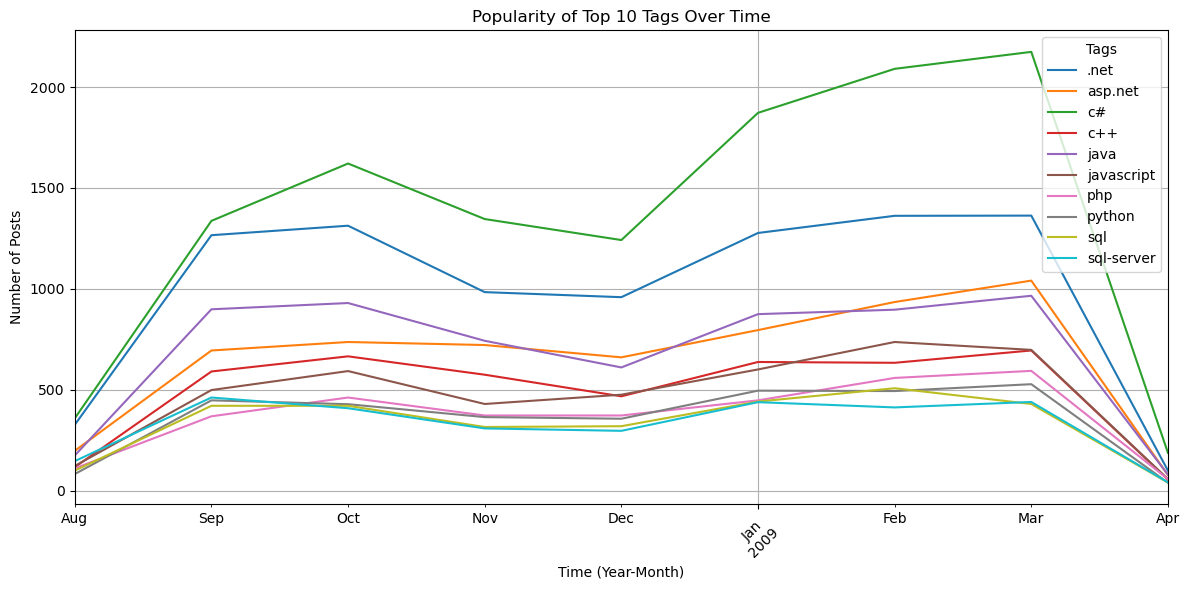

In [23]:
# Plot the popularity of top tags over time
plt.figure(figsize=(12, 6))
pivoted_tags.plot(ax=plt.gca())
plt.title('Popularity of Top 10 Tags Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Posts')
plt.legend(title='Tags')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Differences in the frequency and types of questions asked on weekdays vs. weekends

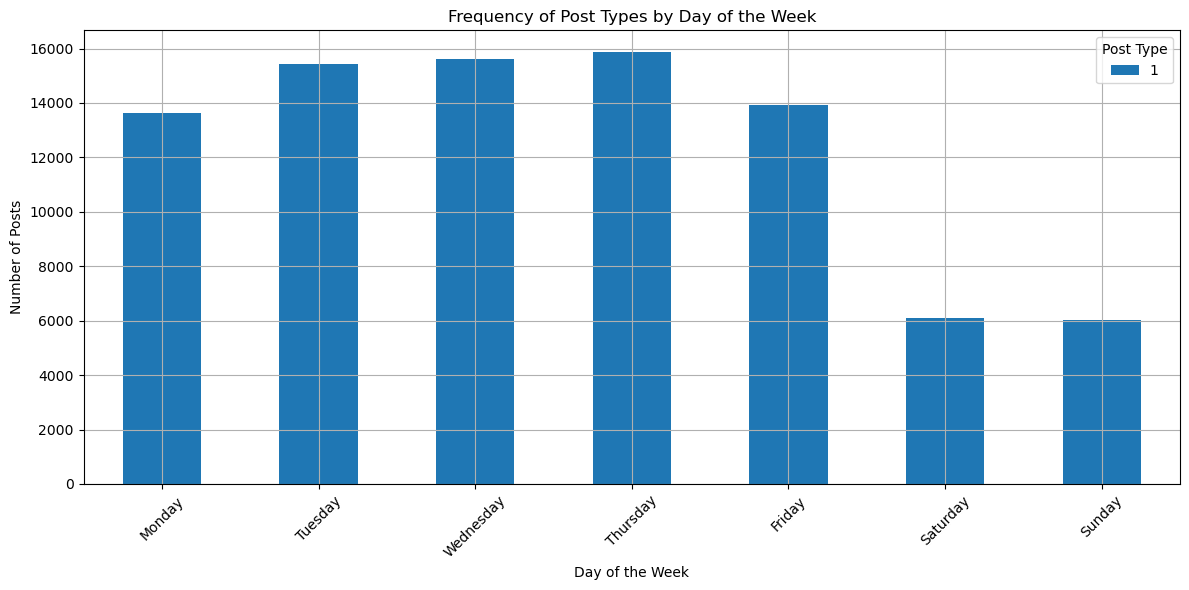

In [24]:
# Extract the day of the week from the CreationDate
df['DayOfWeek'] = df['CreationDate'].dt.day_name()

# Group by DayOfWeek and PostTypeId to get counts
post_types_by_day = df.groupby(['DayOfWeek', 'PostTypeId']).size().reset_index(name='Count')

# Pivot the data for plotting
pivoted_post_types_by_day = post_types_by_day.pivot(index='DayOfWeek', columns='PostTypeId', values='Count').fillna(0)

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivoted_post_types_by_day = pivoted_post_types_by_day.reindex(days_order)

# Plot the frequency of post types by day of the week
plt.figure(figsize=(12, 6))
pivoted_post_types_by_day.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Frequency of Post Types by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Posts')
plt.legend(title='Post Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Are there any noticeable differences in the frequency and types of questions asked on Stack Overflow during weekdays versus weekends?

In [25]:
#Count of Weekend/WeekDays

# Extract day of the week from CreationDate
df['DayOfWeek'] = df['CreationDate'].dt.dayofweek

# Categorize days into weekdays (0-4) and weekends (5-6)
df['WeekdayOrWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count the number of questions by weekday or weekend
weekday_weekend_counts = df[df['PostTypeId'] == 1]['WeekdayOrWeekend'].value_counts().reset_index()
weekday_weekend_counts.columns = ['WeekdayOrWeekend', 'Count']

weekday_weekend_counts


,WeekdayOrWeekend,Count
0,Weekday,74476
1,Weekend,12153


C:\Users\olaka\AppData\Local\Temp\ipykernel_35984\353337873.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_vs_weekend, x='DayType', y='Count', palette='viridis')


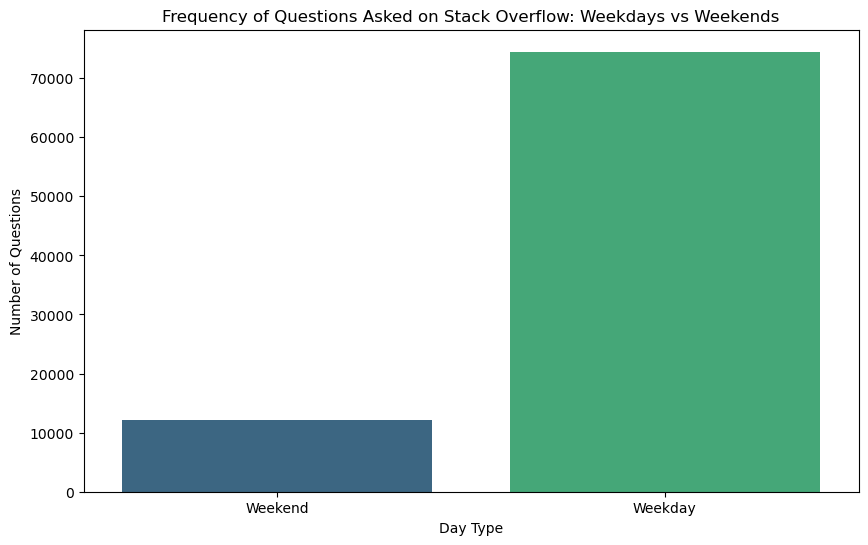

In [26]:

# Add a column to indicate whether the day is a weekday or weekend
df['DayOfWeek'] = df['CreationDate'].dt.dayofweek
df['Weekday'] = df['DayOfWeek'] < 5  # Weekdays are represented by 0-4, weekends by 5-6

# Group by Weekday and count the number of questions
weekday_vs_weekend = df.groupby('Weekday').size().reset_index(name='Count')
weekday_vs_weekend['DayType'] = weekday_vs_weekend['Weekday'].map({True: 'Weekday', False: 'Weekend'})

# Plotting the frequency of questions during weekdays vs weekends
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_vs_weekend, x='DayType', y='Count', palette='viridis')
plt.title('Frequency of Questions Asked on Stack Overflow: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Questions')
plt.show()



#Top 10 Most Answered Questions for a Particular Creation Date

In [27]:
# Define the particular creation date
particular_date = '2008-09-02'  # Example date, change as needed

# Filter the dataset for the particular creation date
filtered_df = df[df['CreationDate'].dt.date == pd.to_datetime(particular_date).date()]


# Sorting by 'PostTypeId' in descending order to get the most answered questions
top_answered_questions = filtered_df[filtered_df['PostTypeId'] == 1].sort_values(by='CommentCount', ascending=False).head(10)

# Display the top 10 most answered questions
top_answered_questions[['Title', 'CommentCount', 'CreationDate']]


,Title,CommentCount,CreationDate
3619,Is a GUID unique 100% of the time?,20,2008-09-02 15:17:22.680
14489,What are the differences between a HashMap and...,5,2008-09-02 20:12:00.117
4987,Why doesn't JavaScript support multithreading?,5,2008-09-02 16:03:23.773
172,Move all windows to a single monitor (with two...,5,2008-09-02 09:05:28.643
2963,Visual Studio 2005/2012: How to keep first cur...,5,2008-09-02 13:52:48.050
7572,Force unmount of NFS-mounted directory,5,2008-09-02 19:04:44.290
567,Database Design for Revisions?,5,2008-09-02 11:36:38.517
5392,How to Compare Flags in C#?,5,2008-09-02 18:28:16.733
248,How do I install a color theme for IntelliJ ID...,4,2008-09-02 10:31:38.813
6168,How do I remove an item from a stl vector with...,3,2008-09-02 16:14:13.170


In [28]:
# desired creation date
specific_date = '2008-12-25'

# Filter the dataframe for the specific creation date
specific_date_df = df[df['CreationDate'].dt.date == pd.to_datetime(specific_date).date()]

# Sort by CommentCount in descending order and get the top 10 most answered questions
top_10_answered = specific_date_df.sort_values(by='CommentCount', ascending=False).head(10)

print(top_10_answered[['Id', 'PostTypeId', 'CreationDate', 'Score', 'Title', 'Tags', 'OwnerDisplayName', 'CommentCount']])


            Id  PostTypeId            CreationDate  Score  \
277788  392789           1 2008-12-25 12:54:18.960     12   
277690  392770           1 2008-12-25 11:52:20.613      4   
272637  392587           1 2008-12-25 06:49:44.610      4   
268946  392375           1 2008-12-25 00:12:43.817     16   
271296  392513           1 2008-12-25 04:35:25.427     11   
269603  392416           1 2008-12-25 01:30:10.527     14   
281326  393191           1 2008-12-25 21:11:42.730      3   
278326  392983           1 2008-12-25 17:19:12.997      2   
278240  392979           1 2008-12-25 17:15:39.573      3   
282122  393208           1 2008-12-25 21:48:23.610     34   

                                                    Title  \
277788   Are you taking up Perl and what got you into it?   
277690                   Force use of CDATA in XML-schema   
272637  What should I propose for a reusable code libr...   
268946                Turn while loop into math equation?   
271296                 

#Percentage of Unanswered Questions in 2009

In [29]:
# Filter the dataframe for the year 2009
df_2009 = df[df['CreationDate'].dt.year == 2009]

# Calculate the total number of questions in 2009
total_questions_2009 = df_2009.shape[0]

# Calculate the number of unanswered questions assuming unanswered questions have CommentCount == 0
unanswered_questions_2009 = df_2009[df_2009['CommentCount'] == 0].shape[0]

# Calculate the percentage of unanswered questions
percentage_unanswered_2009 = (unanswered_questions_2009 / total_questions_2009) * 100

print(f"Percentage of unanswered questions in 2009: {percentage_unanswered_2009:.2f}%")


Percentage of unanswered questions in 2009: 64.87%


In [30]:
# Significant unanswered questions from 2009.

# Filter questions created in 2009 with no answers
unanswered_2009 = df[(df['CreationDate'].dt.year == 2009) & (df['PostTypeId'] == 1) & (df['CommentCount'] == 0)]

# Define a threshold for significance (e.g., score > 10)
significant_unanswered_2009 = unanswered_2009[unanswered_2009['Score'] > 10]

# Select relevant columns for display
significant_unanswered_2009 = significant_unanswered_2009[['Id', 'CreationDate', 'Title', 'Score']]

significant_unanswered_2009

,Id,CreationDate,Title,Score
241093,407983,2009-01-02 20:50:53.583,C# 3.0 generic type inference - passing a dele...,25
241214,408042,2009-01-02 21:09:21.753,Vector graphics in iText PDF,14
241429,408080,2009-01-02 21:28:47.877,"Is there a foreach in MATLAB? If so, how does ...",180
241614,408110,2009-01-02 21:49:28.287,How do I check out an SVN project into Eclipse...,35
241917,408265,2009-01-02 23:09:56.173,jQuery selection with dynamic id's,12
...,...,...,...,...
499621,628565,2009-03-10 00:44:28.943,Display lines number in Stack Trace for .NET a...,155
499722,618378,2009-03-06 10:33:38.420,Select unique or distinct values from a list i...,319
499760,628570,2009-03-10 00:46:44.960,JSF Tuning,12
499837,684457,2009-03-26 03:52:29.823,How do you clear a single entry from a ruby on...,30


#Average Comments per Question¶

In [31]:
#Average Comments per Question
average_comments = df[df['PostTypeId'] == 1]['CommentCount'].mean()

# Display results
average_comments


0.7924251694005472

#Frequency of Questions by Month/Year¶

In [32]:
#Frequency of Questions by Month/Year
questions_by_month_year = df[df['PostTypeId'] == 1].groupby(df['CreationDate'].dt.to_period('M')).size().reset_index(name='Count')

# Display results
questions_by_month_year

,CreationDate,Count
0,2008-08,2750
1,2008-09,11452
2,2008-10,11874
3,2008-11,9777
4,2008-12,9320
5,2009-01,12377
6,2009-02,13852
7,2009-03,14052
8,2009-04,1175


#Distribution of Scores

In [33]:
# Distribution of Scores
score_distribution = df[df['PostTypeId'] == 1]['Score'].describe()

# Display results
score_distribution

count    86629.000000
mean        34.884808
std        221.592310
min         -9.000000
25%          1.000000
50%          4.000000
75%         13.000000
max      13809.000000
Name: Score, dtype: float64

#Display User ID with Name for the top user

In [34]:
# Display User ID with Name for the top users

# Top Users by Number of Questions
top_users = df[df['PostTypeId'] == 1]['OwnerUserId'].value_counts().head(10).reset_index(name='Count')
top_users.columns = ['OwnerUserId', 'Count']

# Merge top users with the original dataframe to get the display names
top_users_with_names = top_users.merge(df[['OwnerUserId', 'OwnerDisplayName']].drop_duplicates(), on='OwnerUserId', how='left')

# Reorder columns for better readability
top_users_with_names = top_users_with_names[['OwnerUserId', 'OwnerDisplayName', 'Count']]

top_users_with_names


,OwnerUserId,OwnerDisplayName,Count
0,4639,Edward Tanguay,222
1,4653,akantro,180
2,4653,Adam Kantrowitz,180
3,4653,ak,180
4,4653,mek,180
5,16940,Simon,158
6,39677,Blankman,154
7,11333,boris callens,152
8,3153,Brian R. Bondy,148
9,9021,nickf,145


#Most Common Tags

In [35]:
# Most Common Tags
tags_counts = tags_df['Tags'].value_counts().head(10).reset_index(name='Count')
tags_counts.columns = ['Tag', 'Count']

# Display results
tags_counts

,Tag,Count
0,c#,12229
1,.net,8951
2,java,6176
3,asp.net,5863
4,c++,4440
5,javascript,4215
6,php,3347
7,python,3240
8,sql,2999
9,sql-server,2958


#Sentiment Analysis

In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
from nltk.tokenize import word_tokenize

In [37]:
#tokenizating my dataset

# Define a function to tokenize text
def tokenize_text(text):
    return nltk.word_tokenize(text)

# Apply tokenization to the post bodies
df['Tokens'] = df['Body'].apply(tokenize_text)

# Display some results
print(df[['Id', 'CreationDate', 'Score', 'Title', 'Tags', 'OwnerDisplayName', 'Tokens']].head())


       Id            CreationDate  Score  \
0   38779 2008-09-02 03:41:06.880      6   
5   38789 2008-09-02 03:59:44.417      4   
6   38791 2008-09-02 04:01:09.827      4   
13  38801 2008-09-02 04:10:50.413     48   
21  38820 2008-09-02 04:34:20.963     46   

                                               Title  \
0   What SPN do I need to set for a net.tcp service?   
5               Web Service Namespace Dynamic Naming   
6     Which database table Schema is more efficient?   
13      SQL - How to store and navigate hierarchies?   
21                     Which class design is better?   

                                                 Tags OwnerDisplayName  \
0                                [wcf, security, spn]          Esteban   
5                         [c#, asp.net, web-services]       Kevin Lamb   
6                                   [database-design]      Ramesh Soni   
13  [sql, sql-server, oracle, database-design, hie...         realcals   
21                          

In [38]:

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the post bodies
df['SentimentScores'] = df['Body'].apply(sia.polarity_scores)

# Extract sentiment scores into separate columns
df['SentimentPositive'] = df['SentimentScores'].apply(lambda x: x['pos'])
df['SentimentNeutral'] = df['SentimentScores'].apply(lambda x: x['neu'])
df['SentimentNegative'] = df['SentimentScores'].apply(lambda x: x['neg'])
df['SentimentCompound'] = df['SentimentScores'].apply(lambda x: x['compound'])

# Determine the overall sentiment
def overall_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['OverallSentiment'] = df['SentimentCompound'].apply(overall_sentiment)

# Display some results
print(df[['Id', 'CreationDate', 'Score', 'Title', 'Tags', 'OwnerDisplayName', 'SentimentPositive', 'SentimentNeutral', 'SentimentNegative', 'SentimentCompound', 'OverallSentiment']].head())



       Id            CreationDate  Score  \
0   38779 2008-09-02 03:41:06.880      6   
5   38789 2008-09-02 03:59:44.417      4   
6   38791 2008-09-02 04:01:09.827      4   
13  38801 2008-09-02 04:10:50.413     48   
21  38820 2008-09-02 04:34:20.963     46   

                                               Title  \
0   What SPN do I need to set for a net.tcp service?   
5               Web Service Namespace Dynamic Naming   
6     Which database table Schema is more efficient?   
13      SQL - How to store and navigate hierarchies?   
21                     Which class design is better?   

                                                 Tags OwnerDisplayName  \
0                                [wcf, security, spn]          Esteban   
5                         [c#, asp.net, web-services]       Kevin Lamb   
6                                   [database-design]      Ramesh Soni   
13  [sql, sql-server, oracle, database-design, hie...         realcals   
21                          

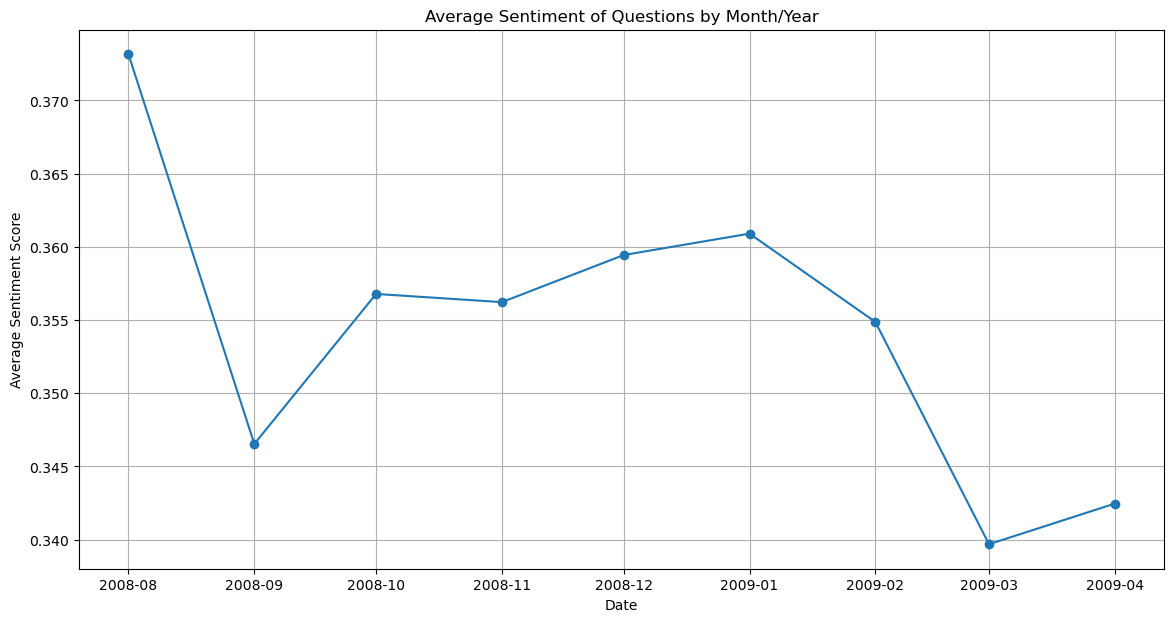

In [39]:
# Initialize the VADER sentiment analyzer
# sia = SentimentIntensityAnalyzer()

# Prepare the data: Extract question bodies and creation dates
questions_data = df[df['PostTypeId'] == 1][['CreationDate', 'Body']].dropna()

# Apply sentiment analysis to each question body
questions_data['Sentiment'] = questions_data['Body'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Aggregate the average sentiment by month/year
questions_data['CreationDate'] = pd.to_datetime(questions_data['CreationDate'])
questions_data['MonthYear'] = questions_data['CreationDate'].dt.to_period('M')
avg_sentiment_by_month_year = questions_data.groupby('MonthYear')['Sentiment'].mean().reset_index()
avg_sentiment_by_month_year['MonthYear'] = avg_sentiment_by_month_year['MonthYear'].dt.to_timestamp()

# Visualize the sentiment trends
plt.figure(figsize=(14, 7))
plt.plot(avg_sentiment_by_month_year['MonthYear'], avg_sentiment_by_month_year['Sentiment'], marker='o', linestyle='-')
plt.title('Average Sentiment of Questions by Month/Year')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

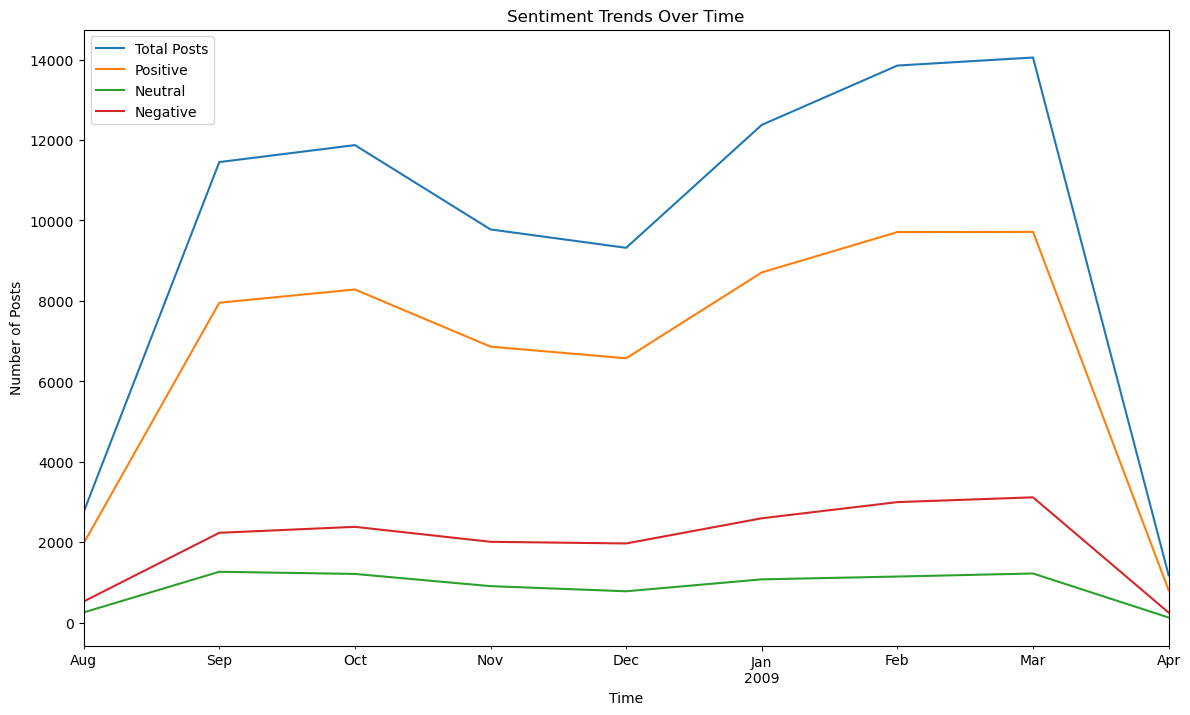

In [40]:
#Sentiment Trends Over Time
plt.figure(figsize=(14, 8))
df.set_index('CreationDate', inplace=True)
df.resample('M').size().plot(label='Total Posts', legend=True)
df[df['OverallSentiment'] == 'Positive'].resample('M').size().plot(label='Positive', legend=True)
df[df['OverallSentiment'] == 'Neutral'].resample('M').size().plot(label='Neutral', legend=True)
df[df['OverallSentiment'] == 'Negative'].resample('M').size().plot(label='Negative', legend=True)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Posts')
plt.legend()
plt.show()

C:\Users\olaka\AppData\Local\Temp\ipykernel_35984\2304251773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverallSentiment', data=df, palette='viridis')


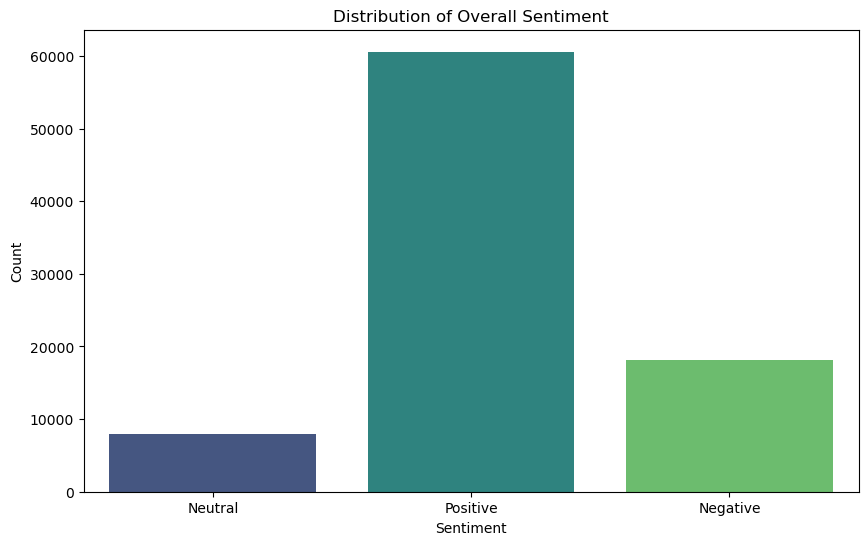

In [41]:
# Distribution of Overall Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(x='OverallSentiment', data=df, palette='viridis')
plt.title('Distribution of Overall Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [42]:
#sentiment valuecount
df['OverallSentiment'].value_counts()

Positive    60582
Negative    18068
Neutral      7979
Name: OverallSentiment, dtype: int64

Text(0.5, 1.0, 'Distribution of Negative Sentiment Scores')

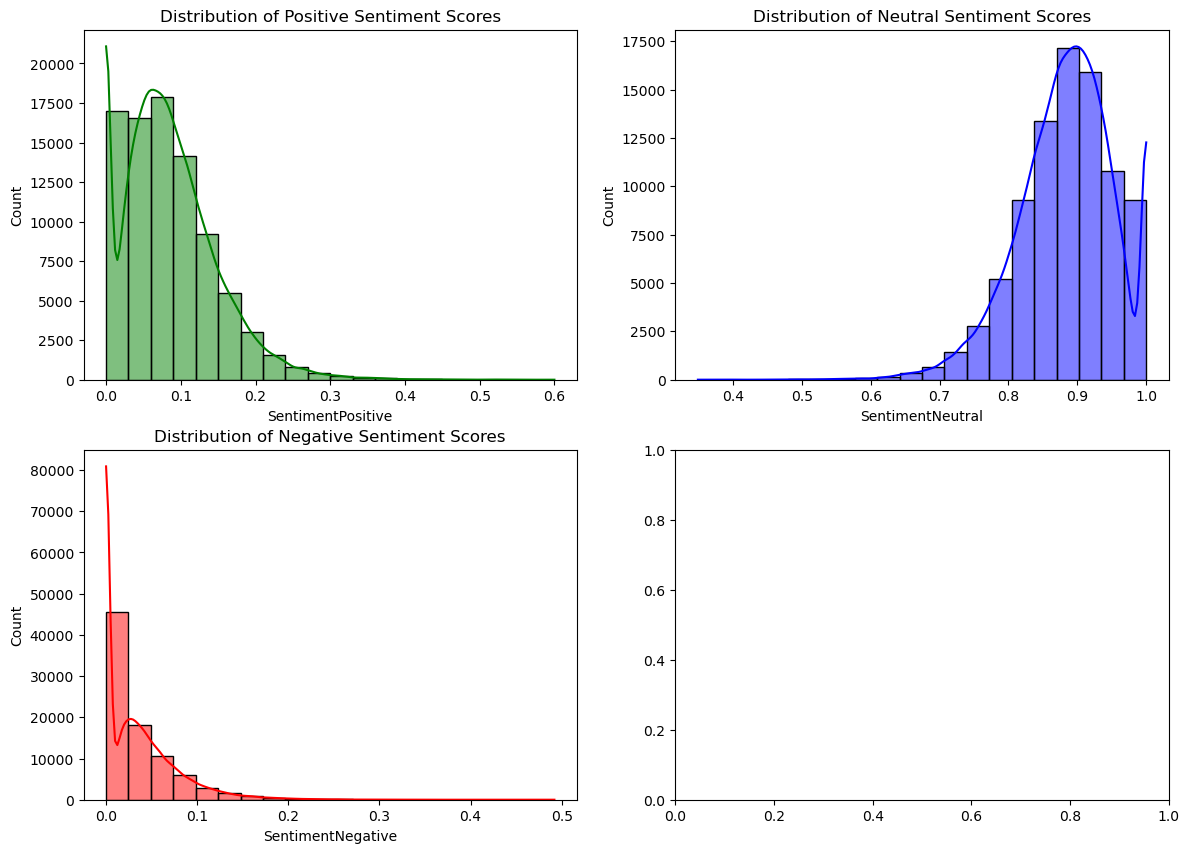

In [43]:
# Distribution of Sentiment Scores
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['SentimentPositive'], bins=20, kde=True, ax=axes[0, 0], color='green')
axes[0, 0].set_title('Distribution of Positive Sentiment Scores')

sns.histplot(df['SentimentNeutral'], bins=20, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Distribution of Neutral Sentiment Scores')

sns.histplot(df['SentimentNegative'], bins=20, kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of Negative Sentiment Scores')

<Axes: >

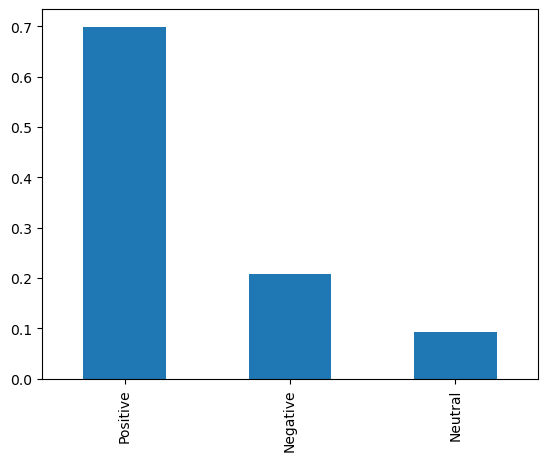

In [44]:
#using plot to generate a bar plot
df['OverallSentiment'].value_counts(normalize=True).plot(kind='bar')

#Predictive Analysis

In [45]:
#import the sklearn for logistic regression model building, prediction and performance evaluation purposes
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
#correlation matrix for the maximum correlated variables with the outcome variable

correlation_matrix = df.corr().round(2)
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                     Id  PostTypeId  Score  OwnerUserId  CommentCount  Year  \
Id                 1.00         NaN  -0.06         0.03          0.03  0.86   
PostTypeId          NaN         NaN    NaN          NaN           NaN   NaN   
Score             -0.06         NaN   1.00        -0.00          0.22 -0.05   
OwnerUserId        0.03         NaN  -0.00         1.00         -0.00  0.03   
CommentCount       0.03         NaN   0.22        -0.00          1.00  0.03   
Year               0.86         NaN  -0.05         0.03          0.03  1.00   
DayOfWeek          0.03         NaN   0.01        -0.01          0.01  0.04   
Weekday           -0.04         NaN  -0.01         0.00         -0.00 -0.04   
SentimentPositive -0.03         NaN  -0.01        -0.01          0.01 -0.02   
SentimentNeutral   0.02         NaN   0.02         0.01         -0.03  0.01   
SentimentNegative  0.01         NaN  -0.02         0.00          0.03  0.01   
SentimentCompound -0.01         

C:\Users\olaka\AppData\Local\Temp\ipykernel_35984\1349456423.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


In [47]:
# Select relevant features and target variable
features = ['CommentCount', 'SentimentPositive', 'SentimentNeutral', 'SentimentNegative', 'SentimentCompound']
target = 'Score'

# Prepare the data
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display some predictions
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


Mean Squared Error: 44328.03550206529
R^2 Score: -0.11217788743810964
                         Actual  Predicted
CreationDate                              
2008-09-15 14:00:49.960       1  16.210000
2009-01-09 01:22:30.583      39  59.830000
2009-03-13 17:54:39.927      11   2.545000
2008-12-14 02:11:35.507       1  11.509215
2009-03-18 14:13:12.697       3  28.550000
